In [1]:
# importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

#sns.set_theme(style='white')

In [2]:
df = pd.read_csv('abalone.csv')

In [3]:
df.head()

,sex,length,diameter,height,whole_wt,shucked_wt,viscera_wt,shell_wt,rings,age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,8.5


### Initial look at the data

In [4]:
df.describe()

,length,diameter,height,whole_wt,shucked_wt,viscera_wt,shell_wt,rings,age
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684,11.433684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000,2.500000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000,9.500000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000,10.500000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000,12.500000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000,30.500000


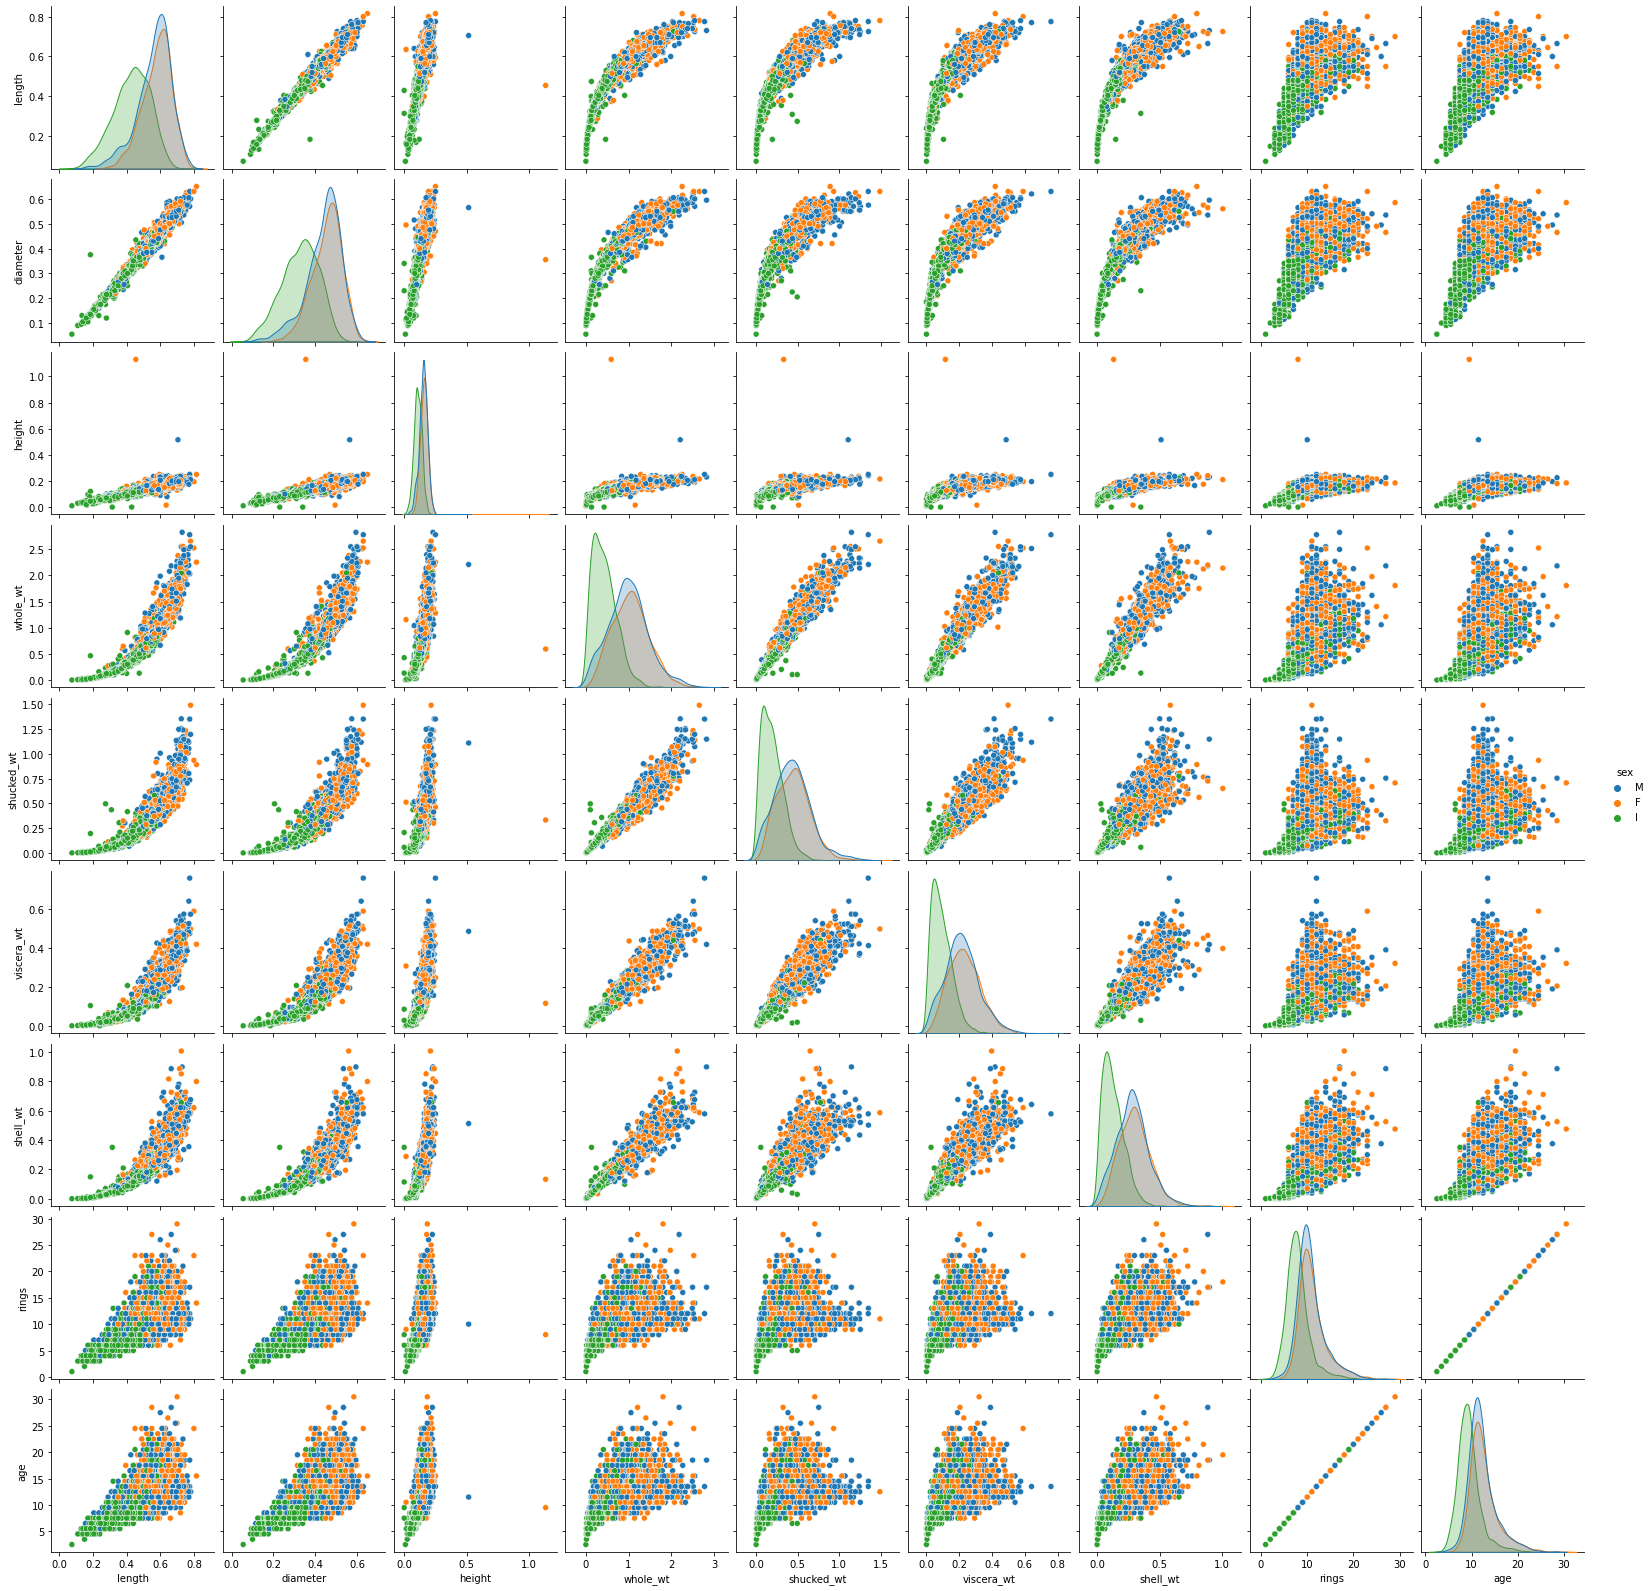

In [5]:
sns.pairplot(df, hue='sex')

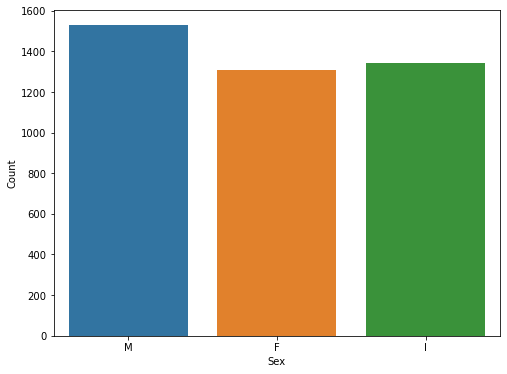

In [6]:
#Additional Plots for 'Sex'
plt.figure(figsize=(8,6))
sns.countplot(data=df, x='sex')
plt.xlabel('Sex')
plt.ylabel('Count');

In [7]:
sva = df.groupby('age')['sex'].value_counts().unstack().fillna(0)
sva = sva[['I', 'F', 'M']].astype('int')

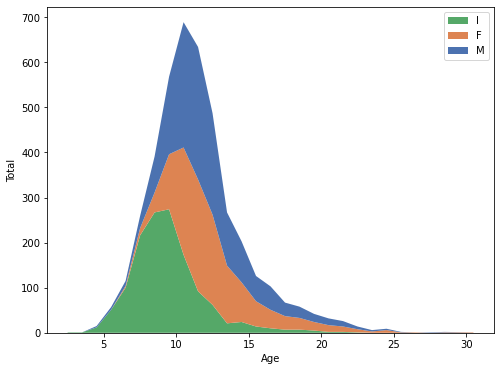

In [8]:
#Stacked Area Chart
plt.figure(figsize=(8,6))
plt.stackplot(sva.index, sva['I'], sva['F'], sva['M'], 
              labels=['I','F','M'], colors=['#55a868', '#dd8452', '#4c72b0'])
plt.xlabel('Age')
plt.ylabel('Total')
plt.legend(loc='upper right');

Things of Interest:
1. 'height' has two extreme outliers, I'll be removing those.
2. 'height' also has 2 values at 0. Those, I will leave, especially since the next points are close to zero.
3. Some rows have a 'whole_wt' less than the sum of 'shucked_wt', 'viscera_wt' and 'shell_wt'. <br> This should not be possible as water/blood will be removed during the shucking process. <br> This could be attributed to a data entry error but the affected rows will not be removed as these won't affect the analysis.

In [9]:
df = df.drop(df.loc[df['height'] > 0.4].index)

In [10]:
df.sort_values('height').head(10)

,sex,length,diameter,height,whole_wt,shucked_wt,viscera_wt,shell_wt,rings,age
3996,I,0.315,0.230,0.000,0.1340,0.0575,0.0285,0.3505,6,7.5
1257,I,0.430,0.340,0.000,0.4280,0.2065,0.0860,0.1150,8,9.5
236,I,0.075,0.055,0.010,0.0020,0.0010,0.0005,0.0015,1,2.5
1174,F,0.635,0.495,0.015,1.1565,0.5115,0.3080,0.2885,9,10.5
2169,I,0.165,0.115,0.015,0.0145,0.0055,0.0030,0.0050,4,5.5
694,I,0.165,0.110,0.020,0.0190,0.0065,0.0025,0.0050,4,5.5
3902,I,0.160,0.120,0.020,0.0180,0.0075,0.0045,0.0050,4,5.5
1987,I,0.160,0.110,0.025,0.0195,0.0075,0.0050,0.0060,4,5.5
720,I,0.160,0.110,0.025,0.0180,0.0065,0.0055,0.0050,3,4.5
2381,M,0.155,0.115,0.025,0.0240,0.0090,0.0050,0.0075,5,6.5


In [11]:
df[df['whole_wt'] < (df['shucked_wt'] + df['viscera_wt'] + df['shell_wt'])]

,sex,length,diameter,height,whole_wt,shucked_wt,viscera_wt,shell_wt,rings,age
42,I,0.240,0.175,0.045,0.0700,0.0315,0.0235,0.0200,5,6.5
43,I,0.205,0.150,0.055,0.0420,0.0255,0.0150,0.0120,5,6.5
44,I,0.210,0.150,0.050,0.0420,0.0175,0.0125,0.0150,4,5.5
45,I,0.390,0.295,0.095,0.2030,0.0875,0.0450,0.0750,7,8.5
46,M,0.470,0.370,0.120,0.5795,0.2930,0.2270,0.1400,9,10.5
...,...,...,...,...,...,...,...,...,...,...
3963,I,0.270,0.205,0.075,0.1180,0.0590,0.0310,0.0305,4,5.5
3969,I,0.380,0.300,0.090,0.2770,0.1655,0.0625,0.0820,6,7.5
3996,I,0.315,0.230,0.000,0.1340,0.0575,0.0285,0.3505,6,7.5
4046,M,0.600,0.460,0.155,0.6655,0.2850,0.1490,0.2690,11,12.5


### How does age relate to the amount of meat present in an abalone? <br> Does the rate of growth slow after a certain point?
A simple linear regression line was drawn over an 'age' vs. 'shucked_wt' scatter plot.

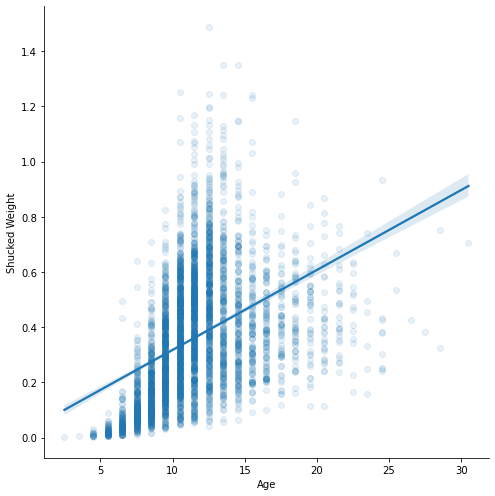

In [12]:
sns.lmplot(data=df, x='age', y='shucked_wt', scatter_kws={'alpha':0.1}, height=7)
plt.xlabel('Age')
plt.ylabel('Shucked Weight');

While the relationship between 'shucked_wt' and 'age' isn't actually linear, we can conclude that the abalone's meat grows larger as the abalone gets older.

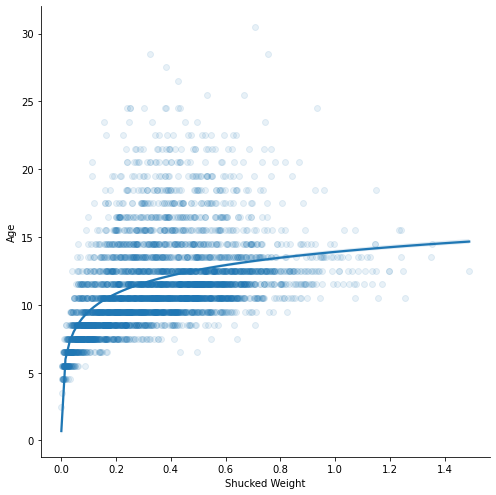

In [13]:
sns.lmplot(data=df, y='age', x='shucked_wt', scatter_kws={'alpha':0.1}, height=7, logx=True)
plt.ylabel('Age')
plt.xlabel('Shucked Weight');

Flipping 'shucked_wt' to the x-axis, we can see an apparent logarithmic relationship between the two variables. <br>
There is a rapid increase of 'shucked_wt' on young abalone which slows down once they age.

The average 'shucked_wt' per age was also visualized and the percent change of weight between ages was calculated.

In [14]:
df_age_meat = df.groupby('age')['shucked_wt'].mean().to_frame()

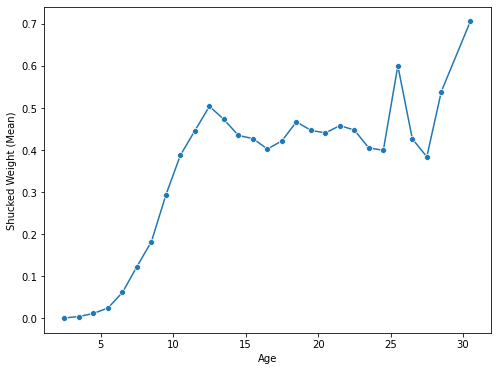

In [15]:
plt.figure(figsize=(8,6))
sns.lineplot(data=df_age_meat, x=df_age_meat.index, y='shucked_wt', marker='o')
plt.xlabel('Age')
plt.ylabel('Shucked Weight (Mean)');

In [16]:
df_age_meat['pct_change'] = df_age_meat.pct_change()
df_age_meat.head(15)

,shucked_wt,pct_change
age,,
2.5,0.001000,NaN
3.5,0.004500,3.500000
4.5,0.011767,1.614815
5.5,0.024719,1.100790
6.5,0.061696,1.495850
7.5,0.123158,0.996223
8.5,0.182657,0.483110
9.5,0.293705,0.607959
10.5,0.387938,0.320839


These show that abalones grow rapidly until around 6.5 years of age where the rate of growth slows down until it plateaus at around 11.5 years.

### Do the shell and meat grow at different rates?
First, a visual comparison was done by plotting the trendline between the two weight variables against age.

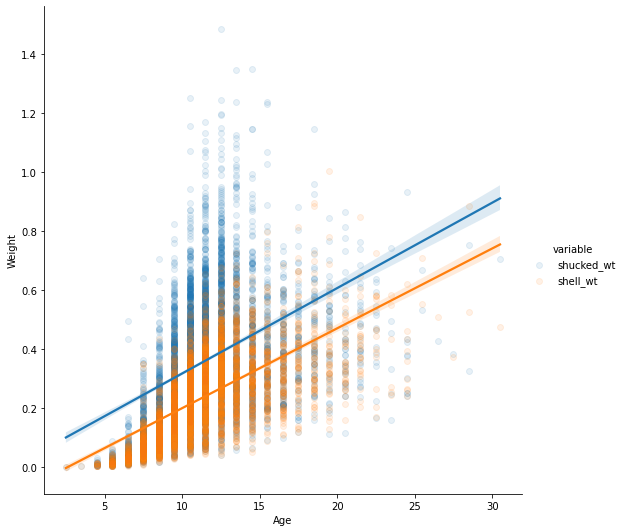

In [17]:
# Reshaping dataframe for visualization
x_df = pd.melt(df, id_vars='age', value_vars=['shucked_wt', 'shell_wt'])

sns.lmplot(data=x_df, x='age', y='value', hue='variable', scatter_kws={'alpha':0.1}, height=7.5)
plt.ylabel('Weight')
plt.xlabel('Age');

The trend lines look parallel but we can see a slightly more steeper line for the 'shucked_wt' variable.
<br>
<br>
Next, a comparison of the equations of these trend lines was done to see the numerical difference in the growth rates.

In [18]:
shucked_fx = np.polyfit(df['age'], df['shucked_wt'], deg=1)
print(f'Shucked weight increases by around {round(shucked_fx[0], 4)} every year.')

Shucked weight increases by around 0.029 every year.


In [19]:
shell_fx = np.polyfit(df['age'], df['shell_wt'], deg=1)
print(f'Shell weight increases by around {round(shell_fx[0], 4)} every year.')

Shell weight increases by around 0.0271 every year.


In [20]:
pct_diff = 100 * (shucked_fx[0] - shell_fx[0]) / shell_fx[0]
print(f'Shucked weight increases by {round(pct_diff, 2)}% faster than shell weight.')

Shucked weight increases by 6.95% faster than shell weight.


### Determine and rank the variables that have the most impact on the amount of meat present in an abalone.

We'll create a linear regression model and use the resulting coefficients from the equation to compare the impact of each variable.

In [21]:
# importing required libraries
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

A heatmap was created to show the correlation of each numerical variable.

<AxesSubplot:>

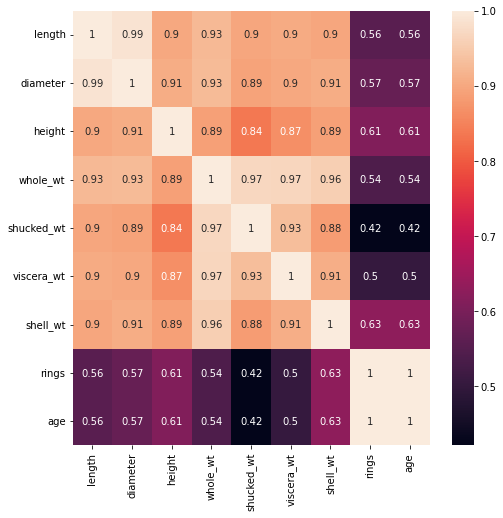

In [22]:
plt.figure(figsize=(8, 8))
sns.heatmap(df.corr(), annot=True)

In order to use the categorical 'sex' column in the regression, dummy variables were created.

In [23]:
df_dummies = pd.get_dummies(df)
df_dummies.head()

,length,diameter,height,whole_wt,shucked_wt,viscera_wt,shell_wt,rings,age,sex_F,sex_I,sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,16.5,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,8.5,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,10.5,1,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,11.5,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,8.5,0,1,0


The model will exclude the following variables:
- 'whole_wt', 'viscera_wt', 'shell_wt': The weight variables are too correlated with 'shucked_wt' which will affect the model. The weight variables are also somewhat redundant already with 'shucked_wt'
- 'sex_I': Redundant to 'sex_F' and 'sex_M'. I chose to remove 'sex_I' as it also is a factor of 'age'.
- 'rings': Redundant variable to 'age' 

In [24]:
# splitting to features (X) and target (y)
X = df_dummies[['length', 'diameter', 'height', 'age', 'sex_F', 'sex_M']]
y = df_dummies['shucked_wt']

In [25]:
# splitting to train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [26]:
# scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [27]:
# creating the regression model, fitting, and predicting.
model = LinearRegression()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

In [28]:
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'RMSE: {RMSE}')

RMSE: 0.09280218227293822


In [29]:
r2 = r2_score(y_test, y_pred)
print(f'r2 score: {r2}')

r2 score: 0.8234966018279924


In [30]:
np.mean(df['shucked_wt'])

0.35919485029940024

In [31]:
# Ranking coefficients

coefficients = pd.DataFrame(data={
        'variable': X_train.columns,
        'coefficient': model.coef_
})

coefficients = coefficients.sort_values(by='coefficient', key=abs, ascending=False)

coefficients

,variable,coefficient
0,length,0.117689
1,diameter,0.059247
2,height,0.042658
3,age,-0.035233
5,sex_M,0.013102
4,sex_F,0.004553


A larger absolute value for the coefficient means a bigger impact from its corresponding variable.

Ranking importance of each variable to meat present:
1. length
2. diameter
3. height
4. age
5. sex